In [300]:
# Author: Hussain Abbas, MSc
# © 2021 Stats AI LLC 
# All Rights Reserved

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

In [301]:
# read in the files into seperate dataframes and inspect

df1 = pd.read_csv('C:/Users/deepl/Desktop/Anomaly_Detection Project/BPX_D.csv')
df2 = pd.read_csv('C:/Users/deepl/Desktop/Anomaly_Detection Project/DEMO_D.csv')
df3 = pd.read_csv('C:/Users/deepl/Desktop/Anomaly_Detection Project/TCHOL_D.csv')
df4 = pd.read_csv('C:/Users/deepl/Desktop/Anomaly_Detection Project/DEMO_RETIRED.csv')

display(df1.head(), df2.head(), df3.head())

,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A
0,31127.0,1.0,41.0,NaN,100.0,NaN
1,31128.0,1.0,401.0,NaN,NaN,2.0
2,31129.0,1.0,664.0,NaN,NaN,1.0
3,31130.0,2.0,NaN,4.0,NaN,2.0
4,31131.0,1.0,827.0,NaN,NaN,2.0


,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEMN,RIDAGEEX,RIDAGEYR,RIDRETH1,DMDEDUC3,DMDEDUC2,DMDSCHOL
0,31127.0,4.0,2.0,1.0,11.0,12.0,5.397605e-79,3.0,NaN,NaN,NaN
1,31128.0,4.0,2.0,2.0,132.0,132.0,1.100000e+01,4.0,4.0,NaN,1.0
2,31129.0,4.0,2.0,1.0,189.0,190.0,1.500000e+01,4.0,10.0,NaN,1.0
3,31130.0,4.0,2.0,2.0,NaN,NaN,8.500000e+01,3.0,NaN,4.0,NaN
4,31131.0,4.0,2.0,2.0,535.0,536.0,4.400000e+01,4.0,NaN,4.0,NaN


,SEQN,LBXTC,LBDTCSI
0,31128.0,129.0,3.34
1,31129.0,170.0,4.40
2,31130.0,NaN,NaN
3,31131.0,105.0,2.72
4,31132.0,147.0,3.80


In [302]:
# merge the three dataframes into one dataframe

df = df1.merge(df2, left_on = 'SEQN', right_on = 'SEQN', how='inner')
df = df.merge(df3, left_on = 'SEQN', right_on = 'SEQN', how='inner')
df_names = df.columns

# convert categorical variables to categorical type

df['SEQN'] = df['SEQN'].astype("category")
df['PEASCST1'] = df['PEASCST1'].astype("category")
df['PEASCCT1'] = df['PEASCCT1'].astype("category")
df['BPQ150A'] = df['BPQ150A'].astype("category")
df['SDDSRVYR'] = df['SDDSRVYR'].astype("category")
df['RIDSTATR'] = df['RIDSTATR'].astype("category")
df['RIAGENDR'] = df['RIAGENDR'].astype("category")
df['RIDAGEYR'] = df['RIDAGEYR'].astype("category")
df['RIDRETH1'] = df['RIDRETH1'].astype("category")
df['DMDEDUC3'] = df['DMDEDUC3'].astype("category")
df['DMDEDUC2'] = df['DMDEDUC2'].astype("category")
df['DMDSCHOL'] = df['DMDSCHOL'].astype("category")

df

,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEMN,RIDAGEEX,RIDAGEYR,RIDRETH1,DMDEDUC3,DMDEDUC2,DMDSCHOL,LBXTC,LBDTCSI
0,31128.0,1.0,401.0,NaN,NaN,2.0,4.0,2.0,2.0,132.0,132.0,11.0,4.0,4.0,NaN,1.0,129.0,3.34
1,31129.0,1.0,664.0,NaN,NaN,1.0,4.0,2.0,1.0,189.0,190.0,15.0,4.0,10.0,NaN,1.0,170.0,4.40
2,31130.0,2.0,NaN,4.0,NaN,2.0,4.0,2.0,2.0,NaN,NaN,85.0,3.0,NaN,4.0,NaN,NaN,NaN
3,31131.0,1.0,827.0,NaN,NaN,2.0,4.0,2.0,2.0,535.0,536.0,44.0,4.0,NaN,4.0,NaN,105.0,2.72
4,31132.0,1.0,730.0,NaN,NaN,2.0,4.0,2.0,1.0,842.0,843.0,70.0,3.0,NaN,5.0,NaN,147.0,3.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8081,41469.0,1.0,715.0,NaN,NaN,2.0,4.0,2.0,1.0,235.0,235.0,19.0,4.0,15.0,NaN,1.0,193.0,4.99
8082,41471.0,1.0,703.0,NaN,NaN,2.0,4.0,2.0,1.0,148.0,149.0,12.0,4.0,5.0,NaN,1.0,142.0,3.67
8083,41472.0,1.0,567.0,NaN,NaN,2.0,4.0,2.0,1.0,410.0,411.0,34.0,3.0,NaN,4.0,NaN,140.0,3.62
8084,41473.0,1.0,645.0,NaN,NaN,2.0,4.0,2.0,1.0,255.0,255.0,21.0,1.0,NaN,2.0,NaN,184.0,4.76


,PEASCTM1,BPXCHR,RIDAGEMN,RIDAGEEX,LBXTC,LBDTCSI
0,401.0,NaN,132.0,132.0,129.0,3.34
1,664.0,NaN,189.0,190.0,170.0,4.40
2,NaN,NaN,NaN,NaN,NaN,NaN
3,827.0,NaN,535.0,536.0,105.0,2.72
4,730.0,NaN,842.0,843.0,147.0,3.80
...,...,...,...,...,...,...
8081,715.0,NaN,235.0,235.0,193.0,4.99
8082,703.0,NaN,148.0,149.0,142.0,3.67
8083,567.0,NaN,410.0,411.0,140.0,3.62
8084,645.0,NaN,255.0,255.0,184.0,4.76


,PEASCTM1,BPXCHR,AGE_AT_SCREENING,AGE_AT_EXAM,LBXTC,LBDTCSI
0,401.000000,78.666667,132.000000,132.000000,129.00000,3.340000
1,664.000000,78.666667,189.000000,190.000000,170.00000,4.400000
2,612.427931,88.550562,400.234316,400.949476,184.47106,4.770417
3,827.000000,78.666667,535.000000,536.000000,105.00000,2.720000
4,730.000000,78.666667,842.000000,843.000000,147.00000,3.800000
...,...,...,...,...,...,...
8081,715.000000,78.666667,235.000000,235.000000,193.00000,4.990000
8082,703.000000,78.666667,148.000000,149.000000,142.00000,3.670000
8083,567.000000,78.666667,410.000000,411.000000,140.00000,3.620000
8084,645.000000,76.666667,255.000000,255.000000,184.00000,4.760000


0.000      72.0
0.025      84.0
0.500     318.0
0.975     962.0
1.000    1019.0
Name: AGE_AT_SCREENING, dtype: float64

0.000      72.0
0.025      85.0
0.500     319.0
0.975     963.0
1.000    1019.0
Name: AGE_AT_EXAM, dtype: float64

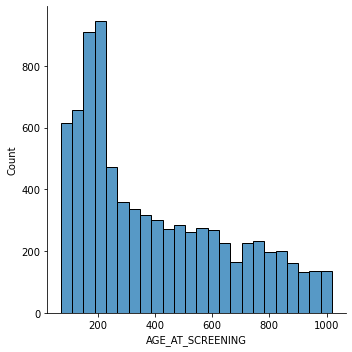

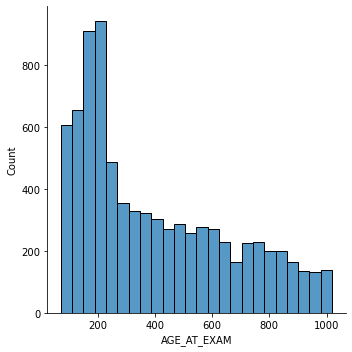

In [303]:
# We are going to use the KNN imputer with 3 nearest neighbors to impute missing values for all numeric columns
# This is a reasonable approach to filling in missing values since it will estimate the missing information from 
# the three closest data vectors. This mitgates the chance that we fill in missing data with irrelevant information 

df_numeric_columns = df.select_dtypes(include='number')

# drop the numeric columns that contain missing data from df
columns_to_drop = list(df_numeric_columns.columns)
df.drop(columns_to_drop, axis=1, inplace = True)

imputer = KNNImputer(n_neighbors=3)
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric_columns), 
                          columns = df_numeric_columns.columns)

df_imputed.rename(columns = {'RIDAGEMN':'AGE_AT_SCREENING', 
                             'RIDAGEEX':'AGE_AT_EXAM'}, inplace = True)

# diplay the numeric columns, before and after using KNN imputation
display(df_numeric_columns)
display(df_imputed)

# display the quantiles for the variables of interest
display(df_imputed.AGE_AT_SCREENING.quantile([0, 0.025, 0.5, 0.975, 1]))
display(df_imputed.AGE_AT_EXAM.quantile([0, 0.025, 0.5, 0.975, 1]))

# display the histograms for the variables of interest
display(sns.displot(df_imputed.AGE_AT_SCREENING))
display(sns.displot(df_imputed.AGE_AT_EXAM))

# update df with the numeric data columns that we filled in using KNN
df = df.merge(df_imputed, left_index=True, right_index=True, how = 'inner')

In [305]:
# We use a dictionary to group the labels in DMDEDUC2 and DMDEDUC3 into logical categories
# Since users are in either one group or the other, data may be missing simply due to being a member of the other group 
# These new columns will then be collapsed into a new education variable reflecting the person's HIGHEST_EDUCATIOn.
# The missing data that remains in HIGHEST EDUCATION will be true missing data which we fill in using the mode. 

d = {1: 'ELEMENTARY', 2: 'ELEMENTARY', 
     3: 'HIGH SCHOOL', 4: 'HIGH SCHOOL', 
     5: 'COLLEGE', 
     7: np.nan, 9: np.nan}

df["DMDEDUC2_NEW"] = df["DMDEDUC2"].map(d)

display(df['DMDEDUC2'].value_counts(dropna=False))
display(df['DMDEDUC2_NEW'].value_counts(dropna=False))

NaN    3313
4.0    1361
3.0    1136
5.0     939
2.0     733
1.0     597
7.0       4
9.0       3
Name: DMDEDUC2, dtype: int64

NaN            3320
HIGH SCHOOL    2497
ELEMENTARY     1330
COLLEGE         939
Name: DMDEDUC2_NEW, dtype: int64

In [306]:
# We use a dictionary to group the labels in DMDEDUC2 and DMDEDUC3 into logical categories
# Since users are in either one group or the other, data may be missing simply due to being a member of the other group 
# These new columns will then be collapsed into a new education variable reflecting the person's HIGHEST_EDUCATIOn.
# The missing data that remains in HIGHEST EDUCATION will be true missing data which we fill in using the mode. 

d = {1: 'ELEMENTARY', 2: 'ELEMENTARY', 3: 'ELEMENTARY', 4: 'ELEMENTARY', 5: 'ELEMENTARY', 6: 'ELEMENTARY', 
     7: 'ELEMENTARY', 8: 'ELEMENTARY', 9: 'ELEMENTARY', 10: 'ELEMENTARY', 11: 'ELEMENTARY', 12: 'ELEMENTARY', 
     13: 'HIGH SCHOOL', 14: 'HIGH SCHOOL', 15: 'HIGH SCHOOL',
     55: 'ELEMENTARY', 66:'ELEMENTARY'}

df["DMDEDUC3_NEW"] = df["DMDEDUC3"].map(d)

display(df['DMDEDUC3'].value_counts(dropna=False))
display(df['DMDEDUC3_NEW'].value_counts(dropna=False))

NaN                      4774
10.0                      300
8.0                       294
9.0                       282
6.0                       280
11.0                      264
7.0                       255
5.397605346934027e-79     232
13.0                      204
3.0                       204
5.0                       201
4.0                       197
1.0                       185
2.0                       182
15.0                      139
12.0                       46
66.0                       36
14.0                       10
99.0                        1
Name: DMDEDUC3, dtype: int64

NaN            5007
ELEMENTARY     2726
HIGH SCHOOL     353
Name: DMDEDUC3_NEW, dtype: int64

In [307]:
# observe the na's in each variable before combining them 
display(df[['DMDEDUC2_NEW', 'DMDEDUC3_NEW']].head())

df['HIGHEST_EDUCATION'] = df['DMDEDUC3_NEW'].fillna('') + df['DMDEDUC2_NEW'].fillna('')

# observe how HIGHEST_EDUCATION combines the two columns
display(df[['DMDEDUC2_NEW', 'DMDEDUC3_NEW', 'HIGHEST_EDUCATION']].head())
              
# We drop the original and scaffolding columns since we no longer need them
df.drop(['DMDEDUC2', 'DMDEDUC3', 'DMDEDUC2_NEW', 'DMDEDUC3_NEW'], axis=1, inplace = True)

# Now we replace the remaining missing data with the mode
df.HIGHEST_EDUCATION[df.HIGHEST_EDUCATION == ''] = df.HIGHEST_EDUCATION.mode()[0]

# verify that the missing data in HIGHEST_EDUCATION has been replaced with the mode (which is ELEMENTARY)
display(df.HIGHEST_EDUCATION.value_counts(dropna=False))

,DMDEDUC2_NEW,DMDEDUC3_NEW
0,NaN,ELEMENTARY
1,NaN,ELEMENTARY
2,HIGH SCHOOL,NaN
3,HIGH SCHOOL,NaN
4,COLLEGE,NaN


,DMDEDUC2_NEW,DMDEDUC3_NEW,HIGHEST_EDUCATION
0,NaN,ELEMENTARY,ELEMENTARY
1,NaN,ELEMENTARY,ELEMENTARY
2,HIGH SCHOOL,NaN,HIGH SCHOOL
3,HIGH SCHOOL,NaN,HIGH SCHOOL
4,COLLEGE,NaN,COLLEGE


<ipython-input-307-e6ac9ff31878>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.HIGHEST_EDUCATION[df.HIGHEST_EDUCATION == ''] = df.HIGHEST_EDUCATION.mode()[0]


ELEMENTARY     4297
HIGH SCHOOL    2850
COLLEGE         939
Name: HIGHEST_EDUCATION, dtype: int64

In [308]:
display(df.head())

# merge all four dataframes into one dataframe to see if we can find additional 
# data to better estimate the missing values in the RETIREMENT field

df_new = df.copy()

df_new = df_new.merge(df4, left_on = 'SEQN', right_on = 'SEQN', how ='right')

df_new['RETIRED'] = df_new['RETIRED'].astype("category")

display(df_new.head())

,SEQN,PEASCST1,PEASCCT1,BPQ150A,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,DMDSCHOL,PEASCTM1,BPXCHR,AGE_AT_SCREENING,AGE_AT_EXAM,LBXTC,LBDTCSI,HIGHEST_EDUCATION
0,31128.0,1.0,NaN,2.0,4.0,2.0,2.0,11.0,4.0,1.0,401.000000,78.666667,132.000000,132.000000,129.00000,3.340000,ELEMENTARY
1,31129.0,1.0,NaN,1.0,4.0,2.0,1.0,15.0,4.0,1.0,664.000000,78.666667,189.000000,190.000000,170.00000,4.400000,ELEMENTARY
2,31130.0,2.0,4.0,2.0,4.0,2.0,2.0,85.0,3.0,NaN,612.427931,88.550562,400.234316,400.949476,184.47106,4.770417,HIGH SCHOOL
3,31131.0,1.0,NaN,2.0,4.0,2.0,2.0,44.0,4.0,NaN,827.000000,78.666667,535.000000,536.000000,105.00000,2.720000,HIGH SCHOOL
4,31132.0,1.0,NaN,2.0,4.0,2.0,1.0,70.0,3.0,NaN,730.000000,78.666667,842.000000,843.000000,147.00000,3.800000,COLLEGE


,SEQN,PEASCST1,PEASCCT1,BPQ150A,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,DMDSCHOL,PEASCTM1,BPXCHR,AGE_AT_SCREENING,AGE_AT_EXAM,LBXTC,LBDTCSI,HIGHEST_EDUCATION,RETIRED
0,31127.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31128.0,1.0,NaN,2.0,4.0,2.0,2.0,11.0,4.0,1.0,401.000000,78.666667,132.000000,132.000000,129.00000,3.340000,ELEMENTARY,0.0
2,31129.0,1.0,NaN,1.0,4.0,2.0,1.0,15.0,4.0,1.0,664.000000,78.666667,189.000000,190.000000,170.00000,4.400000,ELEMENTARY,0.0
3,31130.0,2.0,4.0,2.0,4.0,2.0,2.0,85.0,3.0,NaN,612.427931,88.550562,400.234316,400.949476,184.47106,4.770417,HIGH SCHOOL,1.0
4,31131.0,1.0,NaN,2.0,4.0,2.0,2.0,44.0,4.0,NaN,827.000000,78.666667,535.000000,536.000000,105.00000,2.720000,HIGH SCHOOL,0.0


In [309]:
# Non Retireds have a max AGE_AT_EXAM  of 852. 
# Thus, we could say that anyone with an Age_AT_EXAM > 852 could be a retired person
display(df_new.groupby('RETIRED', dropna=False).quantile([0, 0.025, 0.5, 0.975, 1]))

# However, we don't seem to have any data at all on the SEQN's with missing data for Retirement
# Thus, it seems we are out of luck and must resort to using the mode to fill in the missing data for Retirement
display(df_new[df_new['RETIRED'].isna()])

# Check value counts before replacing missing data
display(df4.RETIRED.value_counts(dropna=False))

# Now we replace the missing data with the mode
df4.RETIRED[df4.RETIRED.isna()] = df4.RETIRED.mode()[0]

# Verify that the missing data has been filled in with the mode
display(df4.RETIRED.value_counts(dropna=False))

SEQN  PEASCTM1      BPXCHR  AGE_AT_SCREENING  AGE_AT_EXAM  \
RETIRED                                                                       
0.0     0.000  31128.0       5.0   58.000000         72.000000         72.0   
        0.025  31379.6      22.0   76.000000         82.000000         83.0   
        0.500  36282.0     626.0   78.666667        267.000000        268.0   
        0.975  41202.2     945.2   94.000000        775.000000        776.2   
        1.000  41474.0    2679.0  240.000000        851.000000        852.0   
1.0     0.000  31130.0       9.0   73.333333         81.333333         82.0   
        0.025  31385.3      33.3   76.666667        221.300000        224.1   
        0.500  36569.0     668.0   78.666667        878.000000        878.0   
        0.975  41211.6    1024.7   91.333333       1011.700000       1011.9   
        1.000  41461.0    1733.0  104.000000       1019.000000       1019.0   

               LBXTC  LBDTCSI  
RETIRED                        
0.0     0.000   78.0    2.020  
        0.025  118.0    3.050  
        0.500  177.0    4.580  
        0.975  279.0    7.210  
        1.000  615.0   15.900  
1.0     0.000   84.0    2.170  
        0.025  120.0    3.100  
        0.500  190.0    4.910  
        0.975  279.7    7.231  
        1.000  345.0    8.920

,SEQN,PEASCST1,PEASCCT1,BPQ150A,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,DMDSCHOL,PEASCTM1,BPXCHR,AGE_AT_SCREENING,AGE_AT_EXAM,LBXTC,LBDTCSI,HIGHEST_EDUCATION,RETIRED
0,31127.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,31135.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,31136.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,31138.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,31165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10316,41443.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10328,41455.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10329,41456.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10336,41463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


0.0    7073
NaN    2262
1.0    1013
Name: RETIRED, dtype: int64

0.0    9335
1.0    1013
Name: RETIRED, dtype: int64